<a href="https://colab.research.google.com/github/divesh07/DataScience/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/train_data.csv')

In [4]:
df.head()

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485,8,2,1,1.0,18,66.61,0.18,5.63,NaN,...,0.384615,inf,49.0,JAVA,large,NaN,1,0.228319,1.0,4
1,77265,85293,4,4,1.0,3321,13848.57,0.06,15.44,10.91,...,0.826087,inf,64.0,Ruby,Medium,Library,8,0.792022,1.0,6
2,62215,14,2,1,2.0,35,151.27,0.14,7.31,19.75,...,0.590909,inf,70.0,ruby,Large,Desktop Application,3,0.725787,5.0,4
3,11168,19,3,1,3.0,38,NaN,0.13,7.5,21.51,...,0.652174,5.5,NaN,Python,Large,Desktop Application,30,3.532268,0.0,10
4,45035,8,3,1,1.0,24,98.10,0.11,9.9,8.40,...,0.846154,inf,216.0,Python,Small,NaN,16,0.732659,NaN,9


In [5]:
df.isnull().sum()

id                                     0
McCabeLineCount                        0
McCabeCyclomaticComplexity             0
McCabeEssentialComplexity              0
McCabeDesignComplexity             16328
HalsteadTotalOperatorsOperands         0
HalsteadVolume                     13718
HalsteadProgramLength                  0
HalsteadDifficulty                  7542
HalsteadIntelligence                5441
HalsteadEffort                         0
HalsteadB                              0
HalsteadTimeEstimator              13856
HalsteadLineCountCode               6229
HalsteadLineCountComment               0
HalsteadLineCountBlank             14139
HalsteadLineCountCodeAndComment     4537
UniqueOperators                    10698
UniqueOperands                         0
TotalOperators                     12735
TotalOperands                          0
BranchCount                            0
defects                                0
CodeDensity                         5712
OperatorToOperan

In [6]:
# Define threshold to drop columns with more than 50% missing values
threshold = len(df) * 0.5

# Drop columns with excessive missing values
df_dropped = df.dropna(thresh=threshold, axis=1)

# Fill missing values in numerical columns with the median
numerical_cols = df_dropped.select_dtypes(include=['float64', 'int64']).columns
df_dropped[numerical_cols] = df_dropped[numerical_cols].apply(lambda x: x.fillna(x.median()), axis=0)
df.head()

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485,8,2,1,1.0,18,66.61,0.18,5.63,NaN,...,0.384615,inf,49.0,JAVA,large,NaN,1,0.228319,1.0,4
1,77265,85293,4,4,1.0,3321,13848.57,0.06,15.44,10.91,...,0.826087,inf,64.0,Ruby,Medium,Library,8,0.792022,1.0,6
2,62215,14,2,1,2.0,35,151.27,0.14,7.31,19.75,...,0.590909,inf,70.0,ruby,Large,Desktop Application,3,0.725787,5.0,4
3,11168,19,3,1,3.0,38,NaN,0.13,7.5,21.51,...,0.652174,5.5,NaN,Python,Large,Desktop Application,30,3.532268,0.0,10
4,45035,8,3,1,1.0,24,98.10,0.11,9.9,8.40,...,0.846154,inf,216.0,Python,Small,NaN,16,0.732659,NaN,9


In [7]:
# pre - processing
numerical_cols_arr = ["HalsteadDifficulty", "HalsteadLineCountBlank", "UniqueOperators", "OperatorToOperandRatio", "ComplexityEfficiency", "CodeAndCommentRatio"]
print(numerical_cols)
print(numerical_cols_arr)

def convert_to_float(value):
        df[value] = df[value].astype(float)
        df[value].replace([np.inf, -np.inf], np.nan, inplace=True)
        df[value].fillna(df[value].median(), inplace=True)

for col in numerical_cols:
    convert_to_float(col)

for i in numerical_cols_arr:
  convert_to_float(i)



Index(['id', 'McCabeLineCount', 'McCabeCyclomaticComplexity',
       'McCabeEssentialComplexity', 'McCabeDesignComplexity',
       'HalsteadTotalOperatorsOperands', 'HalsteadVolume',
       'HalsteadProgramLength', 'HalsteadIntelligence', 'HalsteadEffort',
       'HalsteadB', 'HalsteadTimeEstimator', 'HalsteadLineCountCode',
       'HalsteadLineCountComment', 'HalsteadLineCountCodeAndComment',
       'UniqueOperands', 'TotalOperators', 'TotalOperands', 'BranchCount',
       'CodeDensity', 'CommentDensity', 'OperandsPerOperator',
       'CodeAndCommentRatio', 'CodeAge', 'CodeQuality', 'QualityScore',
       'IsDeprecated', 'TeamSize'],
      dtype='object')
['HalsteadDifficulty', 'HalsteadLineCountBlank', 'UniqueOperators', 'OperatorToOperandRatio', 'ComplexityEfficiency', 'CodeAndCommentRatio']


In [8]:
# Fill missing values with the mode for each categorical column
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
print(categorical_cols)

# Replace missing values in categorical columns with the mode
for column in categorical_cols:
    df[column].replace('nan', np.nan, inplace=True)
    df[column].replace('NAN', np.nan, inplace=True)
    df[column].fillna(df[column].mode()[0], inplace=True)
    #df.dropna(inplace=True)


Index(['defects', 'CodeLanguage', 'CodeSizeCategory', 'CodeType'], dtype='object')


In [9]:
# Display the final summary of missing values
print(df.isnull().sum())

id                                 0
McCabeLineCount                    0
McCabeCyclomaticComplexity         0
McCabeEssentialComplexity          0
McCabeDesignComplexity             0
HalsteadTotalOperatorsOperands     0
HalsteadVolume                     0
HalsteadProgramLength              0
HalsteadDifficulty                 0
HalsteadIntelligence               0
HalsteadEffort                     0
HalsteadB                          0
HalsteadTimeEstimator              0
HalsteadLineCountCode              0
HalsteadLineCountComment           0
HalsteadLineCountBlank             0
HalsteadLineCountCodeAndComment    0
UniqueOperators                    0
UniqueOperands                     0
TotalOperators                     0
TotalOperands                      0
BranchCount                        0
defects                            0
CodeDensity                        0
OperatorToOperandRatio             0
CommentDensity                     0
ComplexityEfficiency               0
O

In [10]:
def remove_nan(column):
  df[column].replace('nan', np.nan, inplace=True)
  df[column].replace('NAN', np.nan, inplace=True)
  df[column].fillna(df[column].mode()[0], inplace=True)
  #df.dropna(inplace=True)

#categorical_feature_arr = ["defects","CodeType", "CodeSizeCategory","CodeLanguage"]

for i in categorical_cols:
  remove_nan(i)

def drop_na(df, col):
  df[col].fillna(df[col].mode()[0], inplace=True)
  df.dropna(inplace=True)
  df = df.dropna(subset=[col])

#for i in categorical_cols:
  #drop_na(df, i)


In [11]:
# Fill missing values with the mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df.head(20)

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485.0,8.0,2.0,1.0,1.0,18.0,66.61,0.18,5.63,25.77,...,0.384615,10.000000,49.0,JAVA,large,Web Application,1.0,0.228319,1.0,4.0
1,77265.0,85293.0,4.0,4.0,1.0,3321.0,13848.57,0.06,15.44,10.91,...,0.826087,10.000000,64.0,Ruby,Medium,Library,8.0,0.792022,1.0,6.0
2,62215.0,14.0,2.0,1.0,2.0,35.0,151.27,0.14,7.31,19.75,...,0.590909,10.000000,70.0,ruby,Large,Desktop Application,3.0,0.725787,5.0,4.0
3,11168.0,19.0,3.0,1.0,3.0,38.0,266.89,0.13,7.50,21.51,...,0.652174,5.500000,75.0,Python,Large,Desktop Application,30.0,3.532268,0.0,10.0
4,45035.0,8.0,3.0,1.0,1.0,24.0,98.10,0.11,9.90,8.40,...,0.846154,10.000000,216.0,Python,Small,Web Application,16.0,0.732659,1.0,9.0
5,48696.0,24.0,6.0,36.0,72.0,56.0,260.06,0.09,10.29,26.35,...,6.818182,10.000000,460.0,C++,Medium,Web Application,35.0,4.615560,0.0,8.0
6,31557.0,29.0,3.0,1.0,3.0,65.0,318.95,0.09,11.00,26.07,...,3.333333,110.000000,100.0,Python,Small,Library,10.0,0.580946,0.0,6.0
7,78371.0,34.0,11.0,7.0,11.0,0.0,0.00,0.00,0.00,0.00,...,0.714286,10.000000,10.0,C++,Medium,Desktop Application,6.0,0.018606,0.0,9.0
8,39455.0,295245.0,6.0,180.0,2.0,149.0,787.52,0.06,16.69,44.86,...,0.752941,4.428571,34.0,C++,Medium,Library,4.0,0.027295,0.0,1.0
9,6752.0,17.0,1.0,1.0,1.0,3969.0,18655.92,0.09,11.50,19.68,...,0.884615,5.000000,51.0,C++,Large,Library,2.0,0.948438,0.0,7.0


In [12]:
df.isnull().sum()

id                                 0
McCabeLineCount                    0
McCabeCyclomaticComplexity         0
McCabeEssentialComplexity          0
McCabeDesignComplexity             0
HalsteadTotalOperatorsOperands     0
HalsteadVolume                     0
HalsteadProgramLength              0
HalsteadDifficulty                 0
HalsteadIntelligence               0
HalsteadEffort                     0
HalsteadB                          0
HalsteadTimeEstimator              0
HalsteadLineCountCode              0
HalsteadLineCountComment           0
HalsteadLineCountBlank             0
HalsteadLineCountCodeAndComment    0
UniqueOperators                    0
UniqueOperands                     0
TotalOperators                     0
TotalOperands                      0
BranchCount                        0
defects                            0
CodeDensity                        0
OperatorToOperandRatio             0
CommentDensity                     0
ComplexityEfficiency               0
O

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74795 entries, 0 to 74794
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               74795 non-null  float64
 1   McCabeLineCount                  74795 non-null  float64
 2   McCabeCyclomaticComplexity       74795 non-null  float64
 3   McCabeEssentialComplexity        74795 non-null  float64
 4   McCabeDesignComplexity           74795 non-null  float64
 5   HalsteadTotalOperatorsOperands   74795 non-null  float64
 6   HalsteadVolume                   74795 non-null  float64
 7   HalsteadProgramLength            74795 non-null  float64
 8   HalsteadDifficulty               74795 non-null  float64
 9   HalsteadIntelligence             74795 non-null  float64
 10  HalsteadEffort                   74795 non-null  float64
 11  HalsteadB                        74795 non-null  float64
 12  HalsteadTimeEstima

In [14]:
# Pre-processing - to lower
def to_lower(cols):
  df[cols]= df[cols].astype(str)
  df[cols]= df[cols].str.lower()
  df[cols].head()

for i in categorical_cols:
  to_lower(i)


In [15]:
df.head()

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485.0,8.0,2.0,1.0,1.0,18.0,66.61,0.18,5.63,25.77,...,0.384615,10.0,49.0,java,large,web application,1.0,0.228319,1.0,4.0
1,77265.0,85293.0,4.0,4.0,1.0,3321.0,13848.57,0.06,15.44,10.91,...,0.826087,10.0,64.0,ruby,medium,library,8.0,0.792022,1.0,6.0
2,62215.0,14.0,2.0,1.0,2.0,35.0,151.27,0.14,7.31,19.75,...,0.590909,10.0,70.0,ruby,large,desktop application,3.0,0.725787,5.0,4.0
3,11168.0,19.0,3.0,1.0,3.0,38.0,266.89,0.13,7.50,21.51,...,0.652174,5.5,75.0,python,large,desktop application,30.0,3.532268,0.0,10.0
4,45035.0,8.0,3.0,1.0,1.0,24.0,98.10,0.11,9.90,8.40,...,0.846154,10.0,216.0,python,small,web application,16.0,0.732659,1.0,9.0


In [16]:
def value_counts(cols):
  df[cols].value_counts()
  print(df[cols].value_counts())

for i in categorical_cols:
  value_counts(i)


defects
false    57807
true     16988
Name: count, dtype: int64
CodeLanguage
java          15088
ruby          15063
python        14952
javascript    14914
c++           14778
Name: count, dtype: int64
CodeSizeCategory
large     35264
small     19848
medium    19683
Name: count, dtype: int64
CodeType
web application        31902
library                21468
desktop application    21425
Name: count, dtype: int64


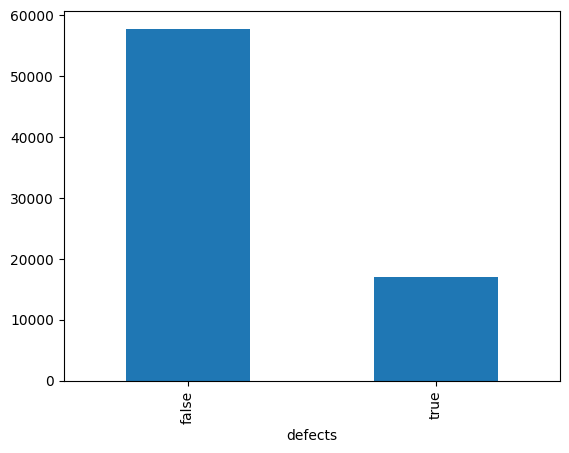

In [17]:
def value_counts_plot(cols):
  df[cols].value_counts(normalize=False).plot(kind="bar")
  #plt.ylim(0, 20000)
  plt.show()

value_counts_plot('defects')


In [18]:
# One-Hot Encoding for categorical columns
#df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
#df_encoded.head()

from sklearn.preprocessing import LabelEncoder

def label_encoding(value):
   le=LabelEncoder()
   df[value]=le.fit_transform(df[value])

for i in categorical_cols:
  label_encoding(i)


In [19]:
df.head()

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485.0,8.0,2.0,1.0,1.0,18.0,66.61,0.18,5.63,25.77,...,0.384615,10.0,49.0,1,0,2,1.0,0.228319,1.0,4.0
1,77265.0,85293.0,4.0,4.0,1.0,3321.0,13848.57,0.06,15.44,10.91,...,0.826087,10.0,64.0,4,1,1,8.0,0.792022,1.0,6.0
2,62215.0,14.0,2.0,1.0,2.0,35.0,151.27,0.14,7.31,19.75,...,0.590909,10.0,70.0,4,0,0,3.0,0.725787,5.0,4.0
3,11168.0,19.0,3.0,1.0,3.0,38.0,266.89,0.13,7.50,21.51,...,0.652174,5.5,75.0,3,0,0,30.0,3.532268,0.0,10.0
4,45035.0,8.0,3.0,1.0,1.0,24.0,98.10,0.11,9.90,8.40,...,0.846154,10.0,216.0,3,2,2,16.0,0.732659,1.0,9.0


In [20]:
# #Find important features

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# import matplotlib.pyplot as plt


# # Preprocessing
# # Encode categorical variables
# label_encoders = {}
# for column in data.select_dtypes(include=['object']).columns:
#     label_encoders[column] = LabelEncoder()
#     data[column] = label_encoders[column].fit_transform(data[column])

# # Normalize numerical variables
# scaler = StandardScaler()
# data[data.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(data.select_dtypes(include=[np.number]))

# # Assuming 'defects' is the target variable
# X = data.drop(columns=['defects'])
# y = data['defects']

# # Train a Random Forest model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X, y)

# # Extract feature importances
# importances = model.feature_importances_
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")
# for i in range(X.shape[1]):
#     print(f"{i + 1}. feature {X.columns[indices[i]]} ({importances[indices[i]]})")

# # Visualize the feature importances
# plt.figure(figsize=(15, 10))
# plt.title("Feature Importances")
# plt.bar(range(X.shape[1]), importances[indices], align="center")
# plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
# plt.xlim([-1, X.shape[1]])
# plt.show()


In [21]:
df[numerical_cols].describe()

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadIntelligence,HalsteadEffort,...,BranchCount,CodeDensity,CommentDensity,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeQuality,QualityScore,IsDeprecated,TeamSize
count,74795.000000,7.479500e+04,74795.000000,74795.000000,74795.000000,7.479500e+04,7.479500e+04,74795.000000,74795.000000,7.479500e+04,...,74795.000000,74795.000000,74795.000000,74795.000000,74795.000000,74795.000000,74795.000000,74795.000000,74795.000000,74795.000000
mean,50887.683722,1.286923e+04,18.488896,26.314727,19.877425,1.198933e+03,4.423129e+03,1.226494,215.825962,1.433703e+05,...,31.712989,14.539667,0.567409,1.751946,17.415396,166.883508,13.588047,1.174133,1.235497,16.425964
std,29418.873220,1.328567e+05,101.184282,412.069219,264.268233,2.773632e+04,7.049566e+04,15.457737,1655.484950,2.826427e+06,...,240.095289,74.201699,4.581161,5.906464,95.498285,730.351013,40.301051,3.694688,6.635136,97.700148
min,0.000000,1.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000040,0.000000,1.000000
25%,25306.500000,1.300000e+01,2.000000,1.000000,2.000000,2.600000e+01,1.339800e+02,0.050000,17.170000,6.837100e+02,...,3.000000,4.333333,0.000000,0.620000,10.000000,48.000000,4.000000,0.296830,0.000000,4.000000
50%,50929.000000,2.400000e+01,3.000000,1.000000,2.000000,5.700000e+01,2.668900e+02,0.100000,25.770000,3.045880e+03,...,7.000000,6.000000,0.000000,0.714286,10.000000,75.000000,7.000000,0.589867,1.000000,7.000000
75%,76419.000000,4.800000e+01,7.000000,5.000000,4.000000,1.380000e+02,5.871550e+02,0.180000,41.440000,1.437252e+04,...,19.000000,9.666667,0.000000,0.842105,10.000000,101.000000,9.000000,0.886945,1.000000,9.000000
max,101761.000000,2.258296e+07,10143.000000,59976.000000,29808.000000,6.056532e+06,7.422030e+06,1356.750000,186857.280000,3.821413e+08,...,30618.000000,14310.000000,400.000000,301.500000,11760.000000,56320.000000,2520.000000,204.910967,1200.000000,21168.000000


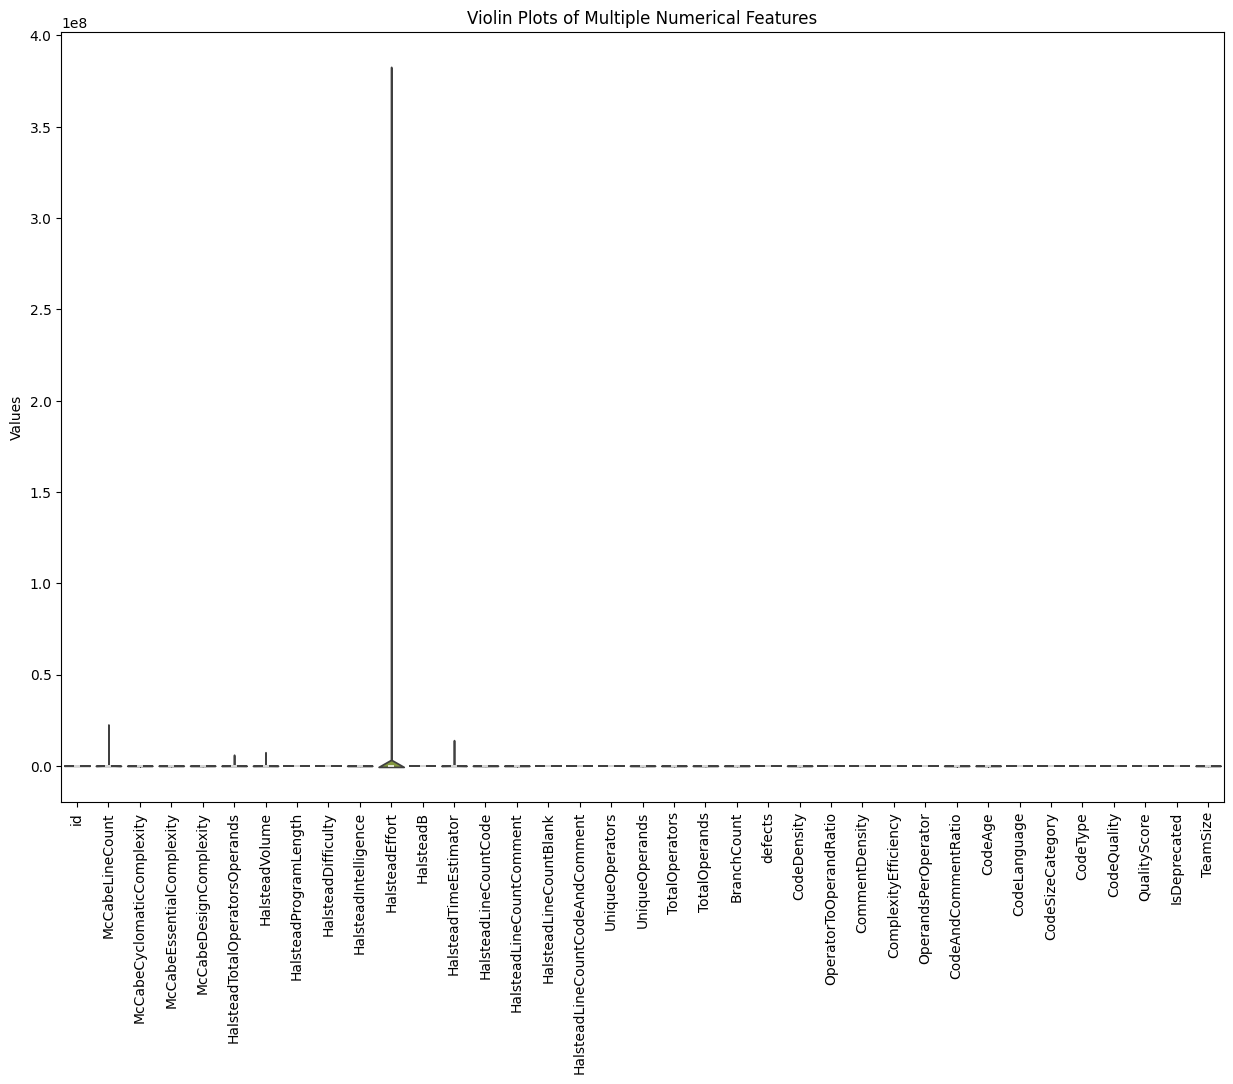

In [22]:
#Create violin plots for each feature
plt.figure(figsize=(15, 10))
sns.violinplot(data=df)
plt.title("Violin Plots of Multiple Numerical Features")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

id                                    Axes(0.125,0.847647;0.032563x0.0323529)
McCabeLineCount                    Axes(0.164076,0.847647;0.032563x0.0323529)
McCabeCyclomaticComplexity         Axes(0.203151,0.847647;0.032563x0.0323529)
McCabeEssentialComplexity          Axes(0.242227,0.847647;0.032563x0.0323529)
McCabeDesignComplexity             Axes(0.281303,0.847647;0.032563x0.0323529)
HalsteadTotalOperatorsOperands     Axes(0.320378,0.847647;0.032563x0.0323529)
HalsteadVolume                     Axes(0.359454,0.847647;0.032563x0.0323529)
HalsteadProgramLength              Axes(0.398529,0.847647;0.032563x0.0323529)
HalsteadDifficulty                 Axes(0.437605,0.847647;0.032563x0.0323529)
HalsteadIntelligence               Axes(0.476681,0.847647;0.032563x0.0323529)
HalsteadEffort                     Axes(0.515756,0.847647;0.032563x0.0323529)
HalsteadB                          Axes(0.554832,0.847647;0.032563x0.0323529)
HalsteadTimeEstimator              Axes(0.593908,0.847647;0.0325

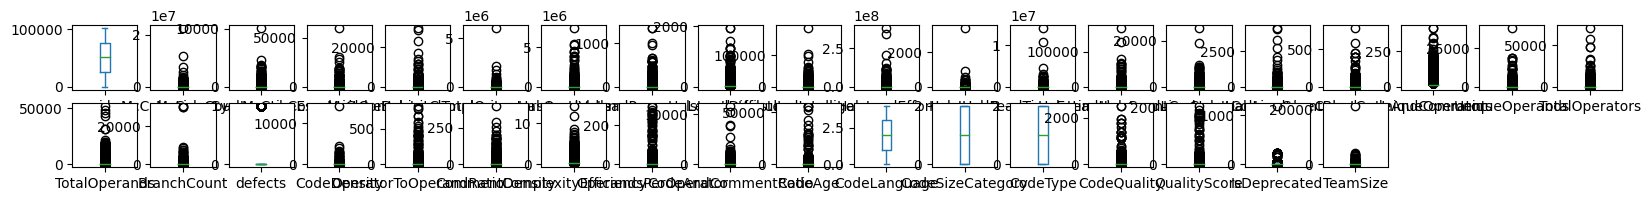

In [23]:
# Box plot of all features
import seaborn as sns
df.plot(subplots=True,kind="box",layout=(20,20),figsize=(20,20))

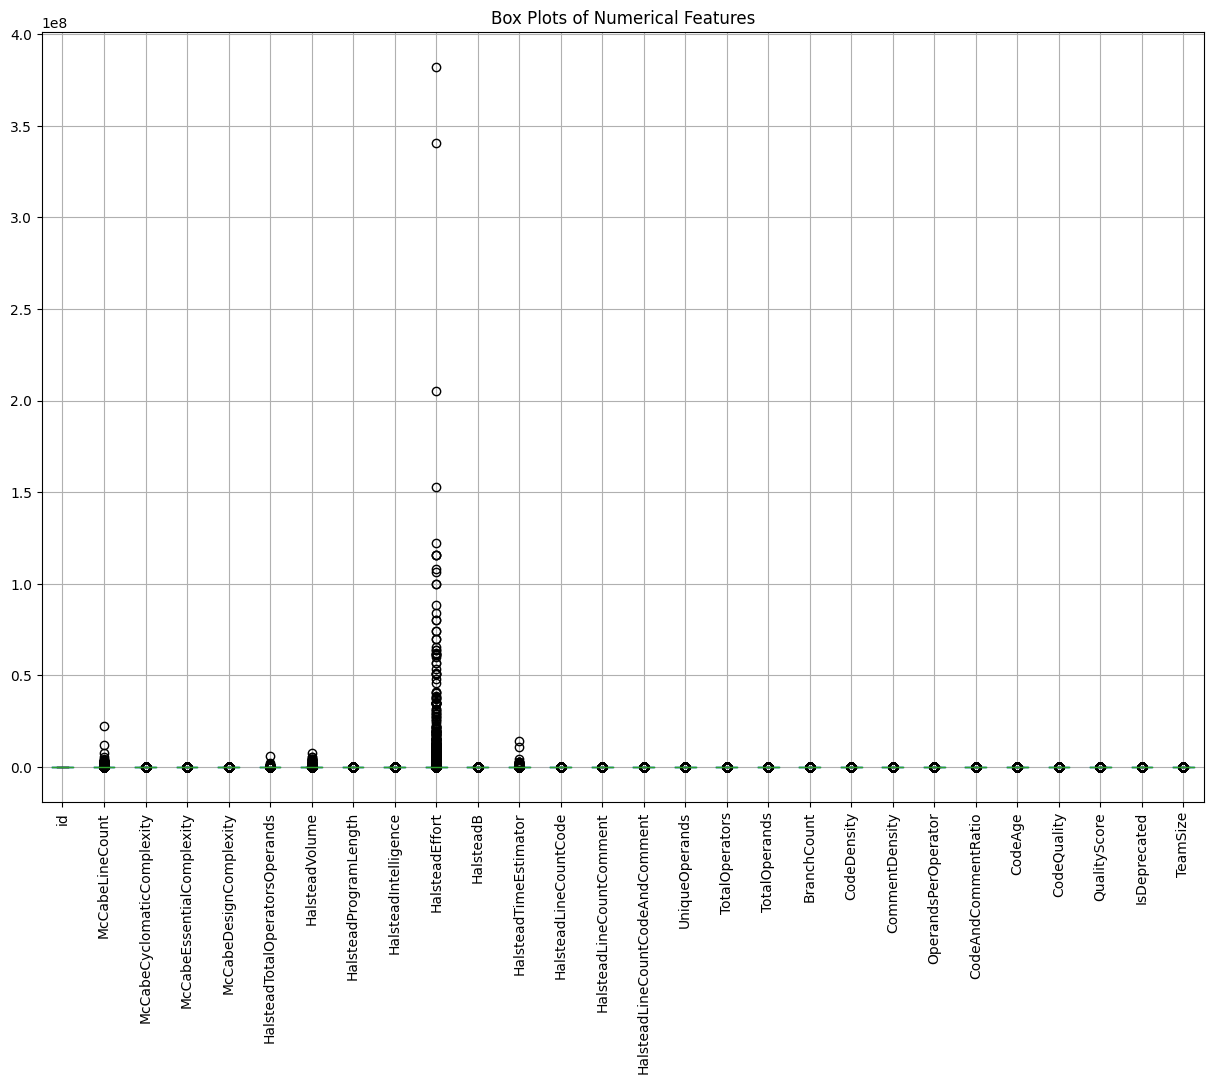

In [24]:
# Create box plots for all numerical values
import matplotlib.pyplot as plt

# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
df[numerical_cols].boxplot()
#sns.boxplot(data=df, y= 'HalsteadEffort')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Box Plots of Numerical Features')
plt.show()

In [25]:
#Picking features with highest variability
high_variability_features = ["McCabeLineCount", "HalsteadEffort", "HalsteadVolume", "HalsteadTotalOperatorsOperands","HalsteadTimeEstimator","HalsteadIntelligence","CodeAge"]

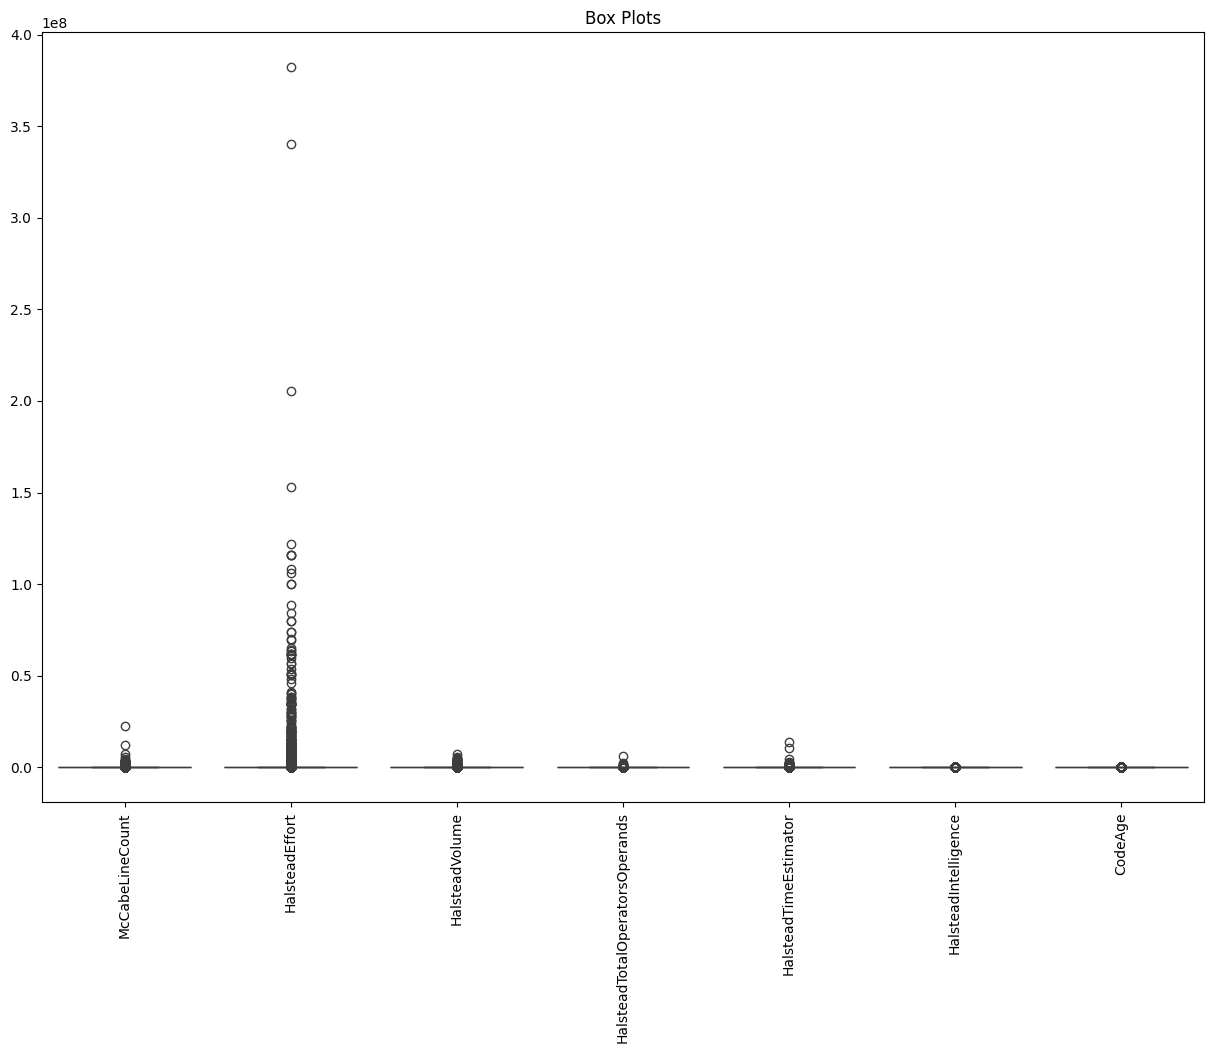

In [26]:

# Show box plot of features with highest variability
def show_all_boxplots(array):
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[array])
    plt.title(f'Box Plots')
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.show()


show_all_boxplots(high_variability_features)


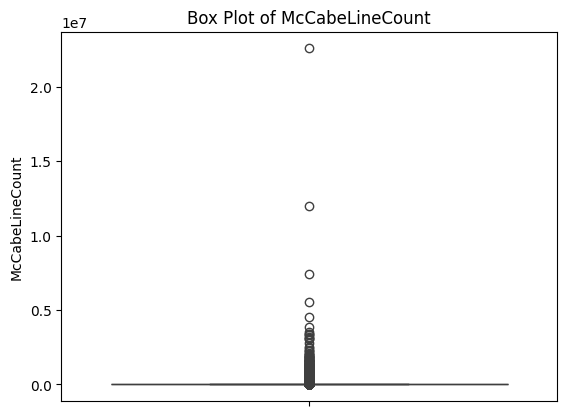

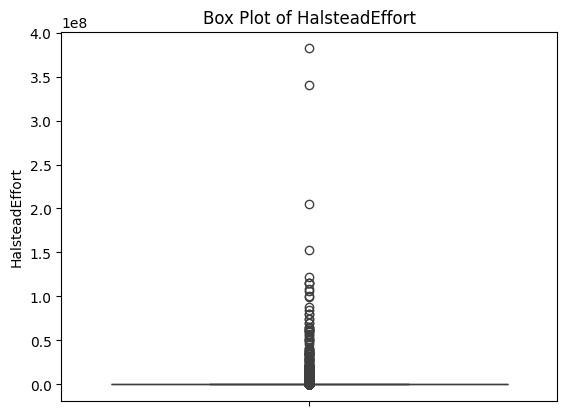

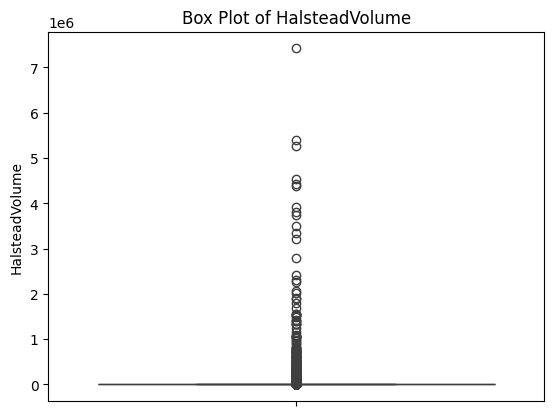

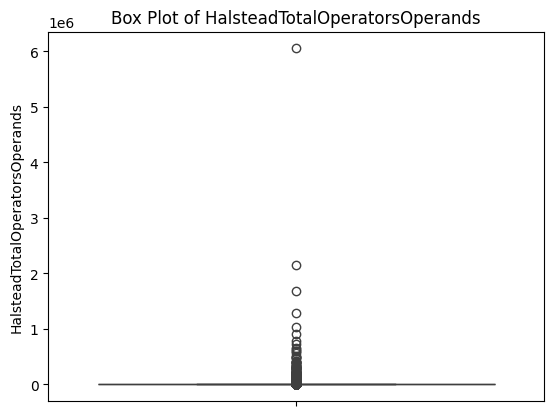

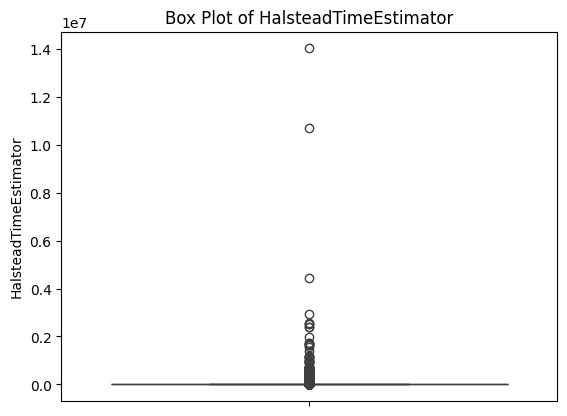

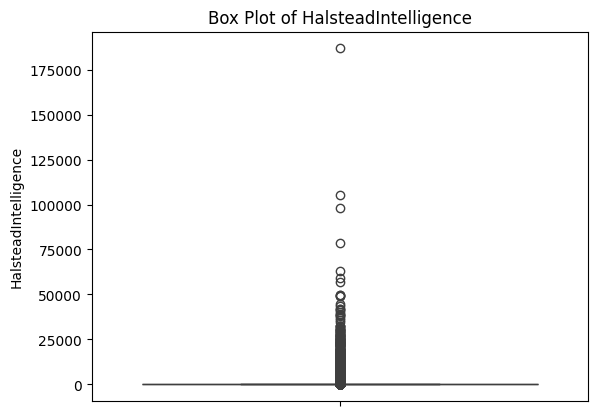

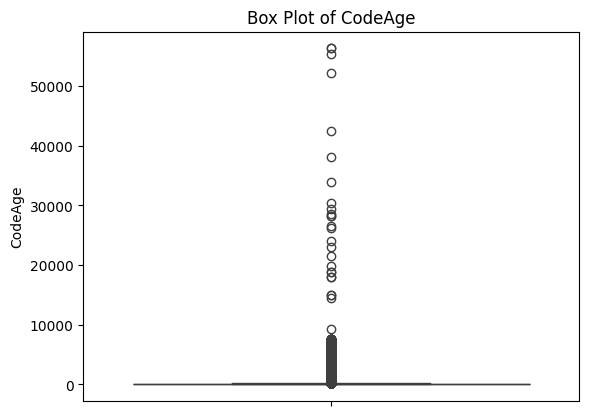

In [27]:
# Individual box plots
def show_boxplot(column):
  sns.boxplot(data=df, y=column)
  plt.title(f'Box Plot of {column}')
  plt.xticks(rotation=90)  # Rotate x-axis labels for readability
  plt.show()

for i in high_variability_features:
  show_boxplot(i)


In [39]:
import numpy as np

outlier_indices = {}
for feature in numerical_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index.tolist()

# Print outliers for each feature
for feature, indices in outlier_indices.items():
    print(f"Outliers in {feature}: {indices}")



Outliers in id: []
Outliers in McCabeLineCount: [532, 739, 750, 770, 853, 866, 955, 961, 1065, 1162, 1351, 1439, 1501, 1516, 1567, 1594, 1653, 1696, 2014, 2097, 2442, 2479, 2606, 2609, 2667, 2887, 3012, 3038, 3273, 3324, 3777, 3903, 4019, 4723, 4757, 5061, 5092, 5435, 5505, 5521, 5684, 5685, 5795, 6247, 6251, 6287, 6640, 6892, 7081, 7801, 7805, 7861, 8464, 8675, 9234, 9316, 9338, 9501, 9667, 9790, 9892, 10000, 10265, 10586, 10942, 12381, 12433, 12593, 12762, 12834, 13057, 13138, 13528, 13555, 13576, 13746, 14203, 14439, 14863, 15172, 15200, 15212, 15225, 15252, 15269, 15402, 15566, 15578, 15683, 15816, 16194, 16553, 16913, 16993, 17048, 17512, 17642, 17929, 18098, 18161, 18225, 18656, 19254, 19398, 19836, 19872, 19987, 20275, 20792, 21016, 21398, 21469, 21673, 21793, 21842, 22412, 22667, 23049, 23195, 23234, 23629, 23724, 23961, 24201, 24669, 24711, 24859, 25296, 25347, 25480, 25955, 26038, 26081, 26112, 26598, 27108, 27300, 27603, 27664, 28005, 28567, 28647, 28668, 28980, 29390, 29446

In [ ]:
# Remove outliers

# # Create a list to store indices of all outliers
# all_outlier_indices = []
# for indices in outlier_indices.values():
#     all_outlier_indices.extend(indices)

# # Remove duplicates (if any)
# all_outlier_indices = list(set(all_outlier_indices))

# # Drop the rows with outlier indices
# df_cleaned = df.drop(all_outlier_indices)

# print(f"Original DataFrame shape: {df.shape}")
# print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

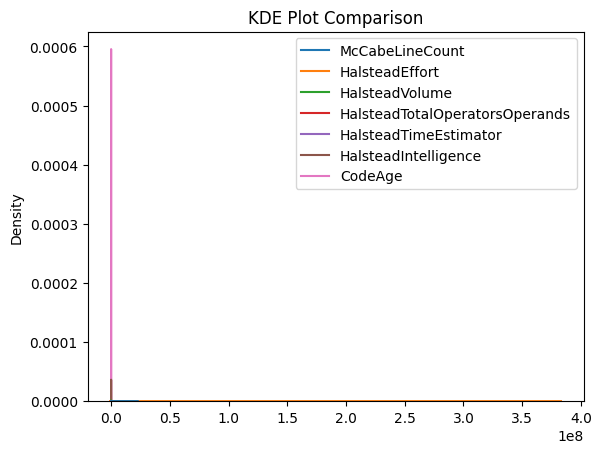

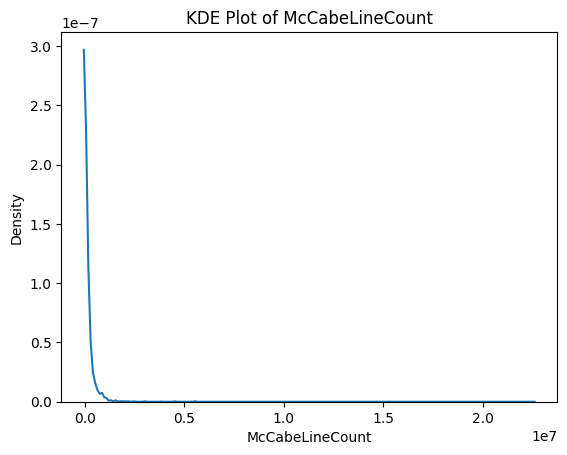

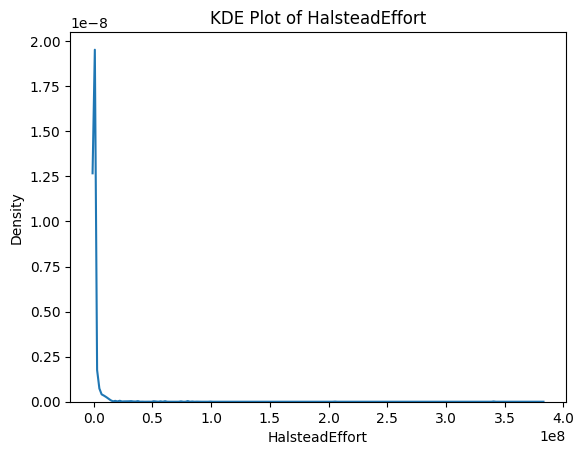

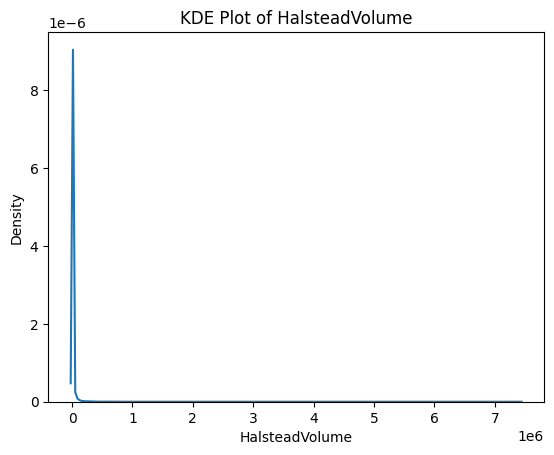

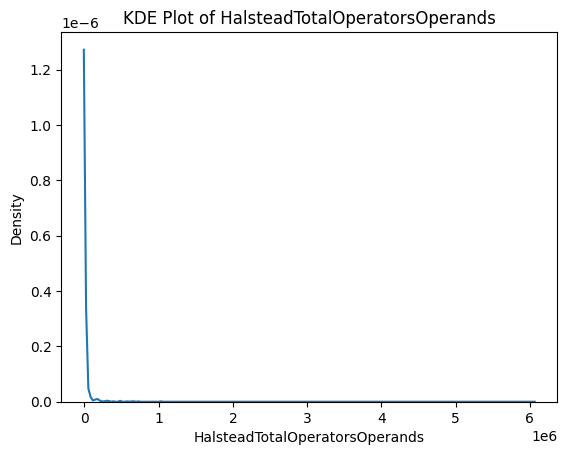

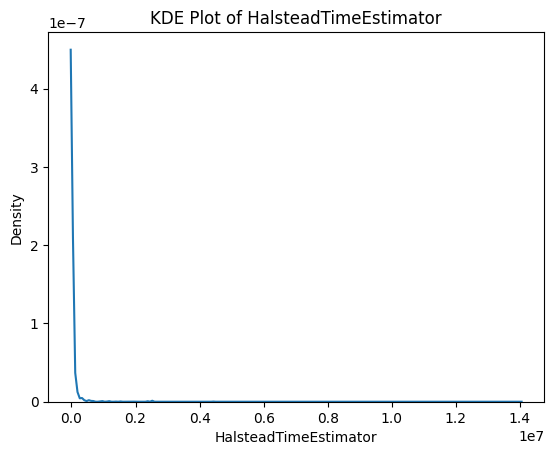

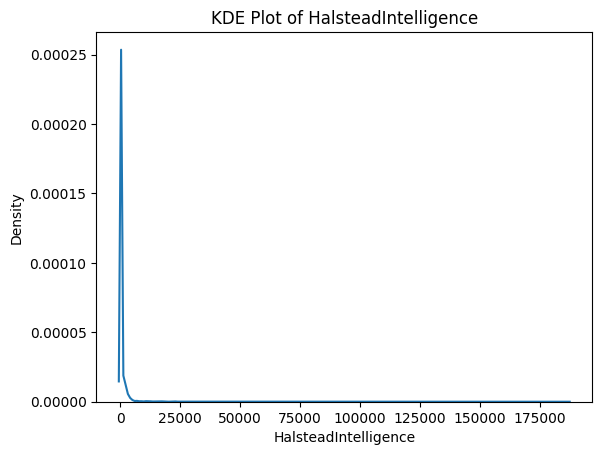

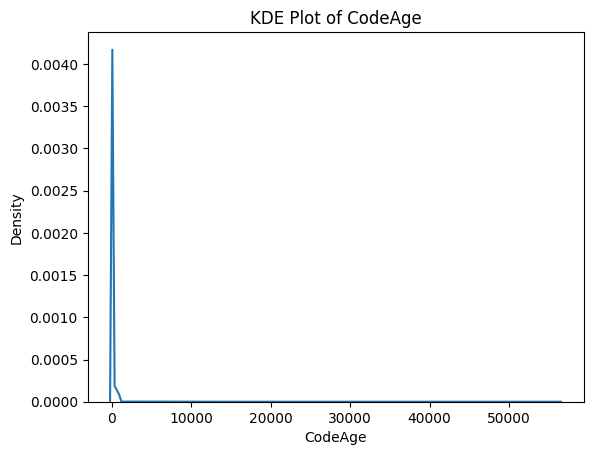

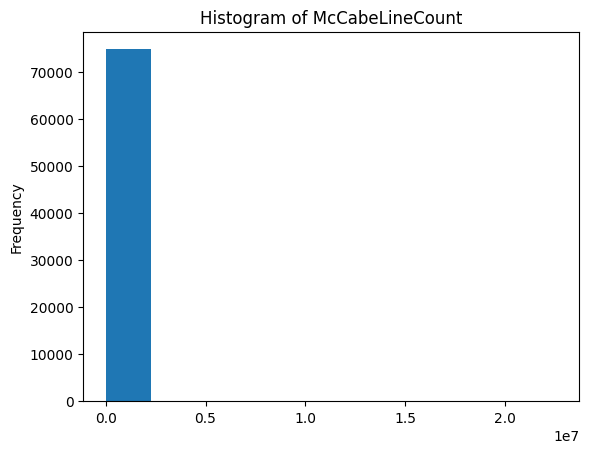

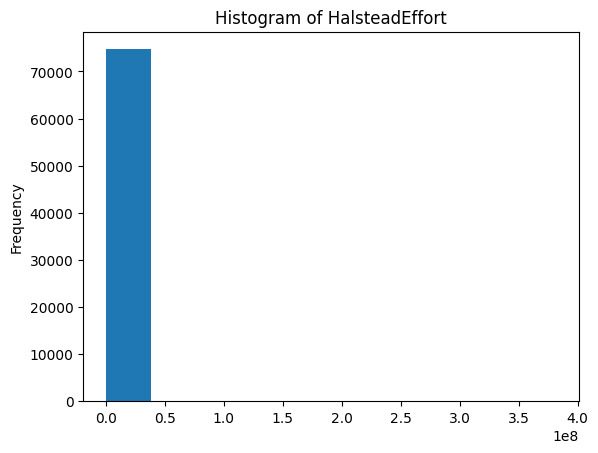

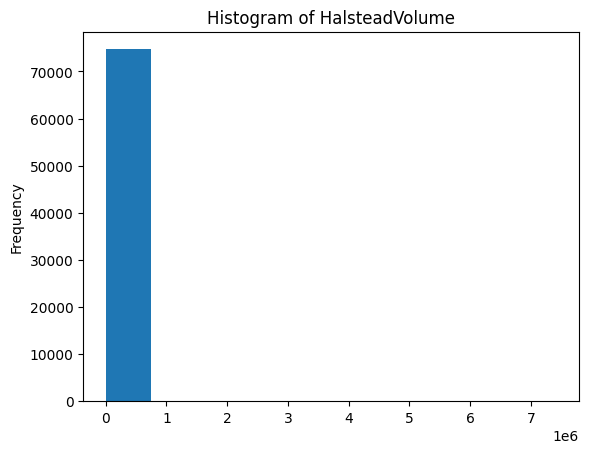

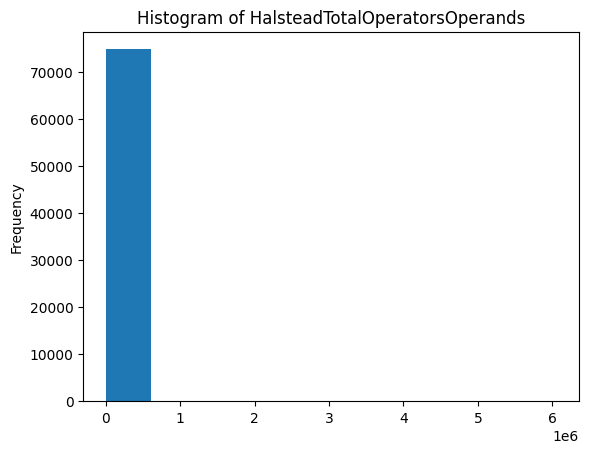

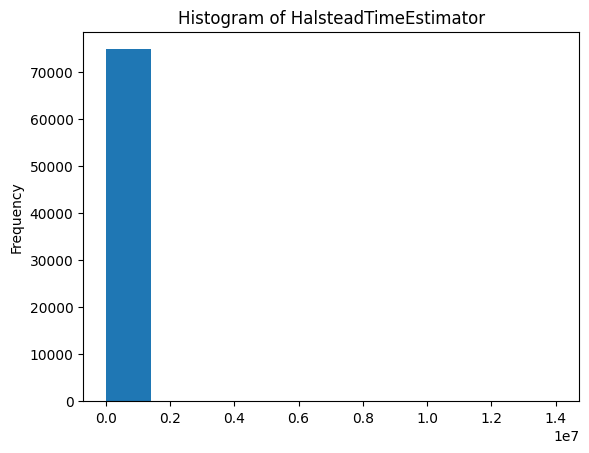

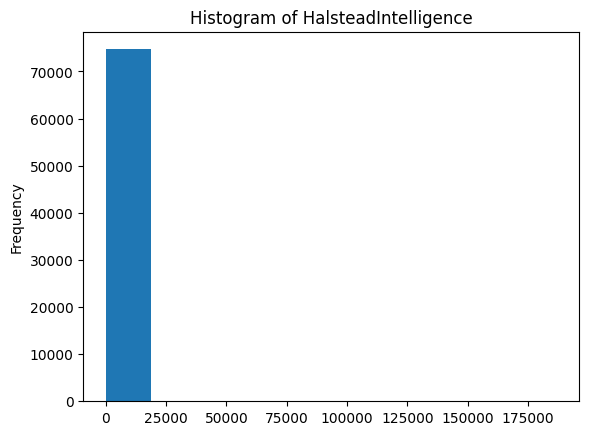

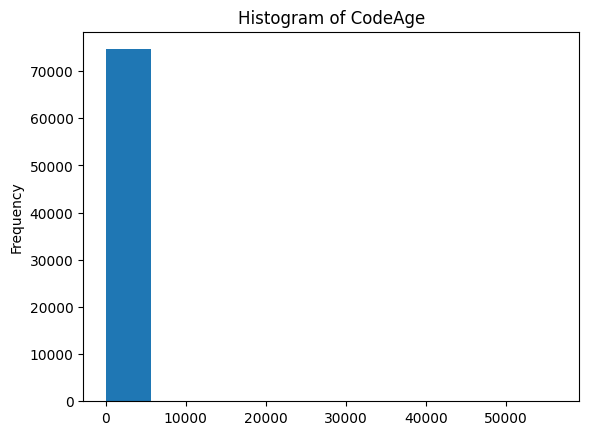

Skewness of McCabeLineCount: 83.57207948672634
Skewness of HalsteadEffort: 75.18171801655588
Skewness of HalsteadVolume: 54.290673888236896
Skewness of HalsteadTotalOperatorsOperands: 153.20636625130683
Skewness of HalsteadTimeEstimator: 127.45638449795557
Skewness of HalsteadIntelligence: 37.528384985160464
Skewness of CodeAge: 38.59700276657838


In [29]:
# KDE Plot
def create_kde_plot(column):
  sns.kdeplot(data=df[high_variability_features])
  plt.title('KDE Plot Comparison')
  plt.show()

def create_kde_plot_single(column):
  sns.kdeplot(data=df[column])
  plt.title(f'KDE Plot of {column}')
  plt.show()

create_kde_plot(high_variability_features)
for i in high_variability_features:
  create_kde_plot_single(i)

# Histogram
def create_hist_plot(column):
  df[column].plot.hist()
  plt.title(f'Histogram of {column}')
  plt.show()

for i in high_variability_features:
  create_hist_plot(i)

# Skewness
def calculate_skewness(column):
  skewness_value = df[column].skew()
  print(f"Skewness of {column}: {skewness_value}")

for i in high_variability_features:
  calculate_skewness(i)


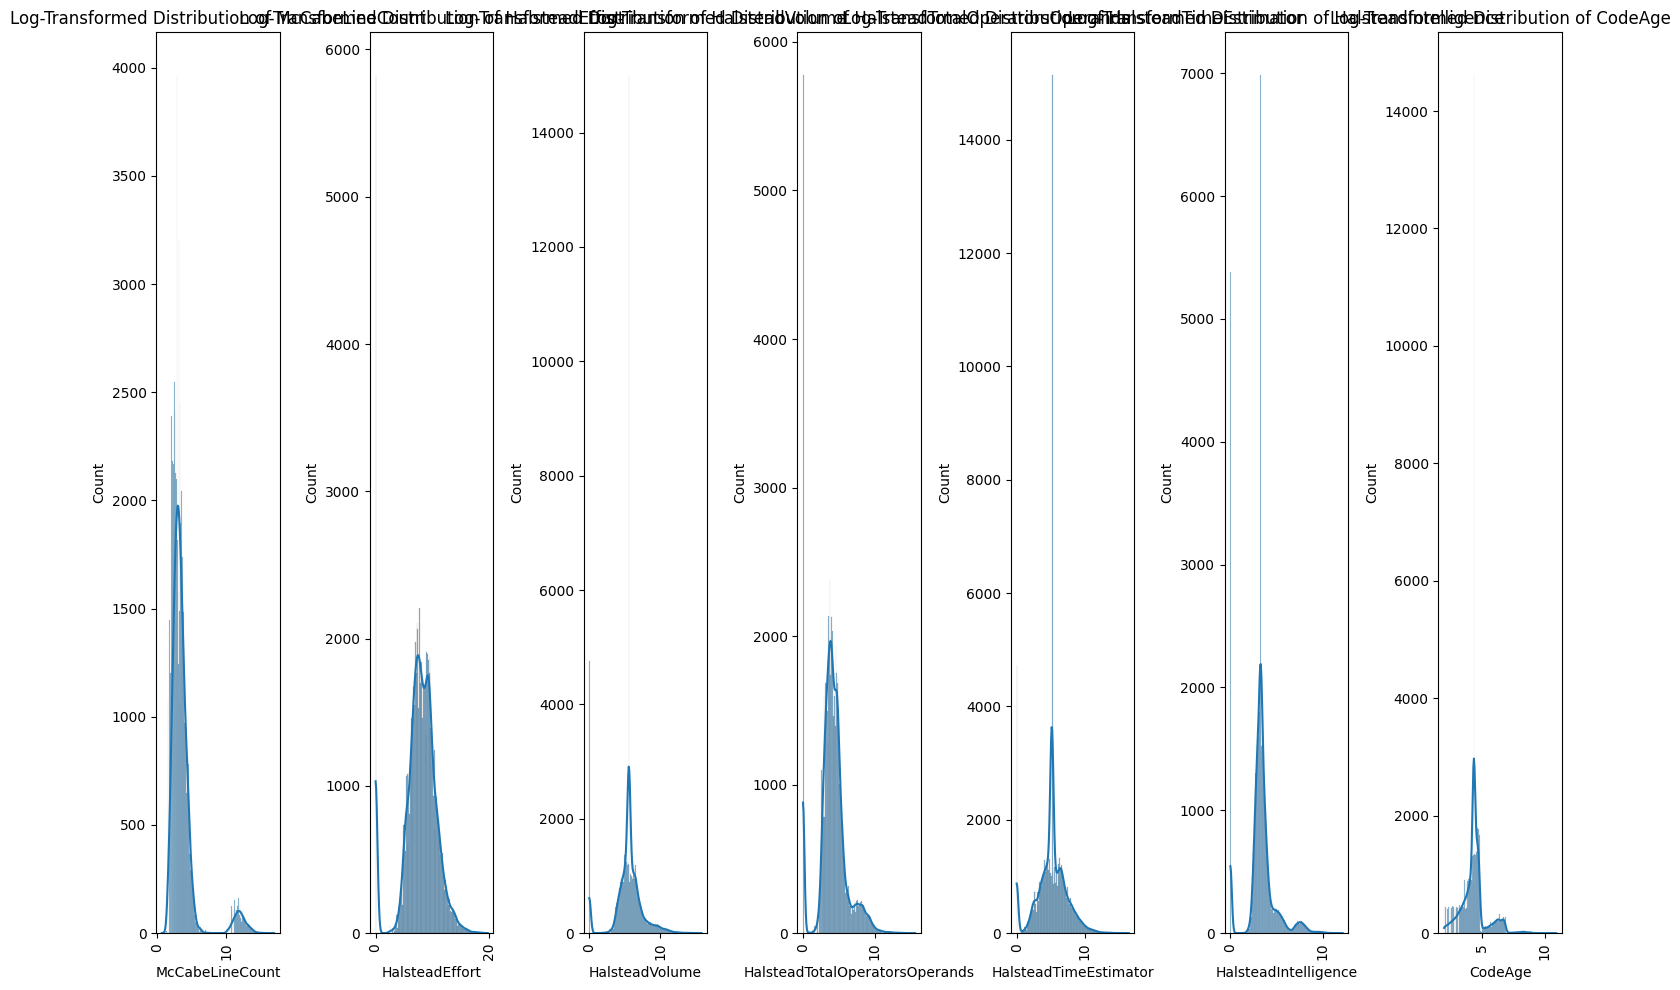

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation (adding 1 to avoid log(0) issues)
for feature in high_variability_features:
    df[feature] = np.log1p(df[feature])

#visualize the transformed distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(high_variability_features):
    plt.subplot(1, len(high_variability_features), i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Log-Transformed Distribution of {feature}")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [36]:
# Calculate skewness for each transformed feature
skewness_after_log = df[high_variability_features].skew()

# Print the results
print(skewness_after_log)

McCabeLineCount                   0.366791
HalsteadEffort                   -0.980847
HalsteadVolume                   -0.752902
HalsteadTotalOperatorsOperands    0.110939
HalsteadTimeEstimator            -0.409171
HalsteadIntelligence              0.029219
CodeAge                           0.375026
dtype: float64


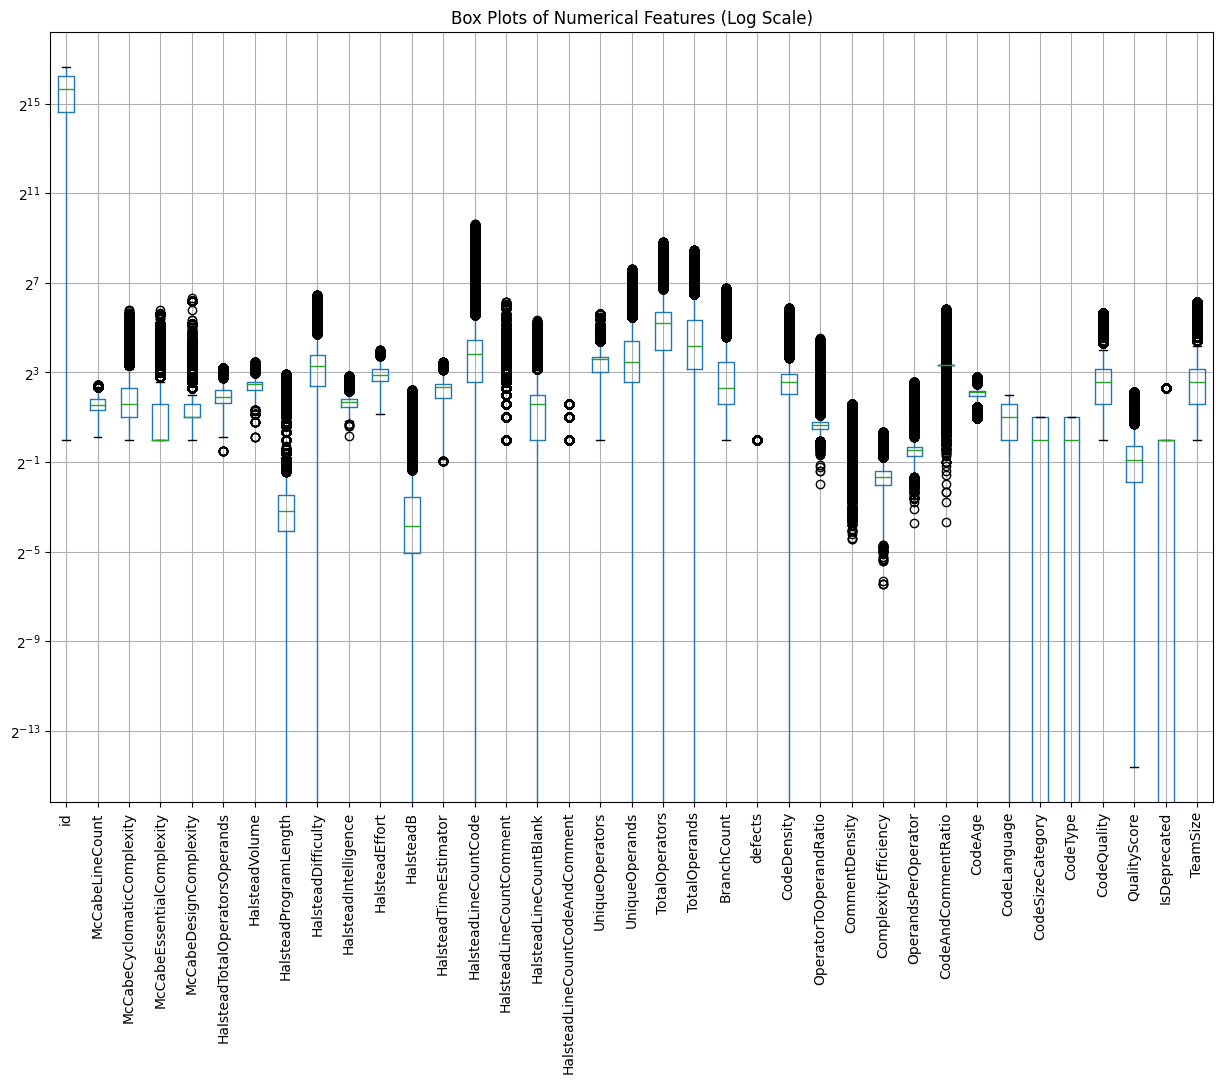

In [51]:
# box plot on a log scale

# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
df[numerical_cols].boxplot()
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.yscale('log', base=2)
plt.title('Box Plots of Numerical Features (Log Scale)')
plt.show()

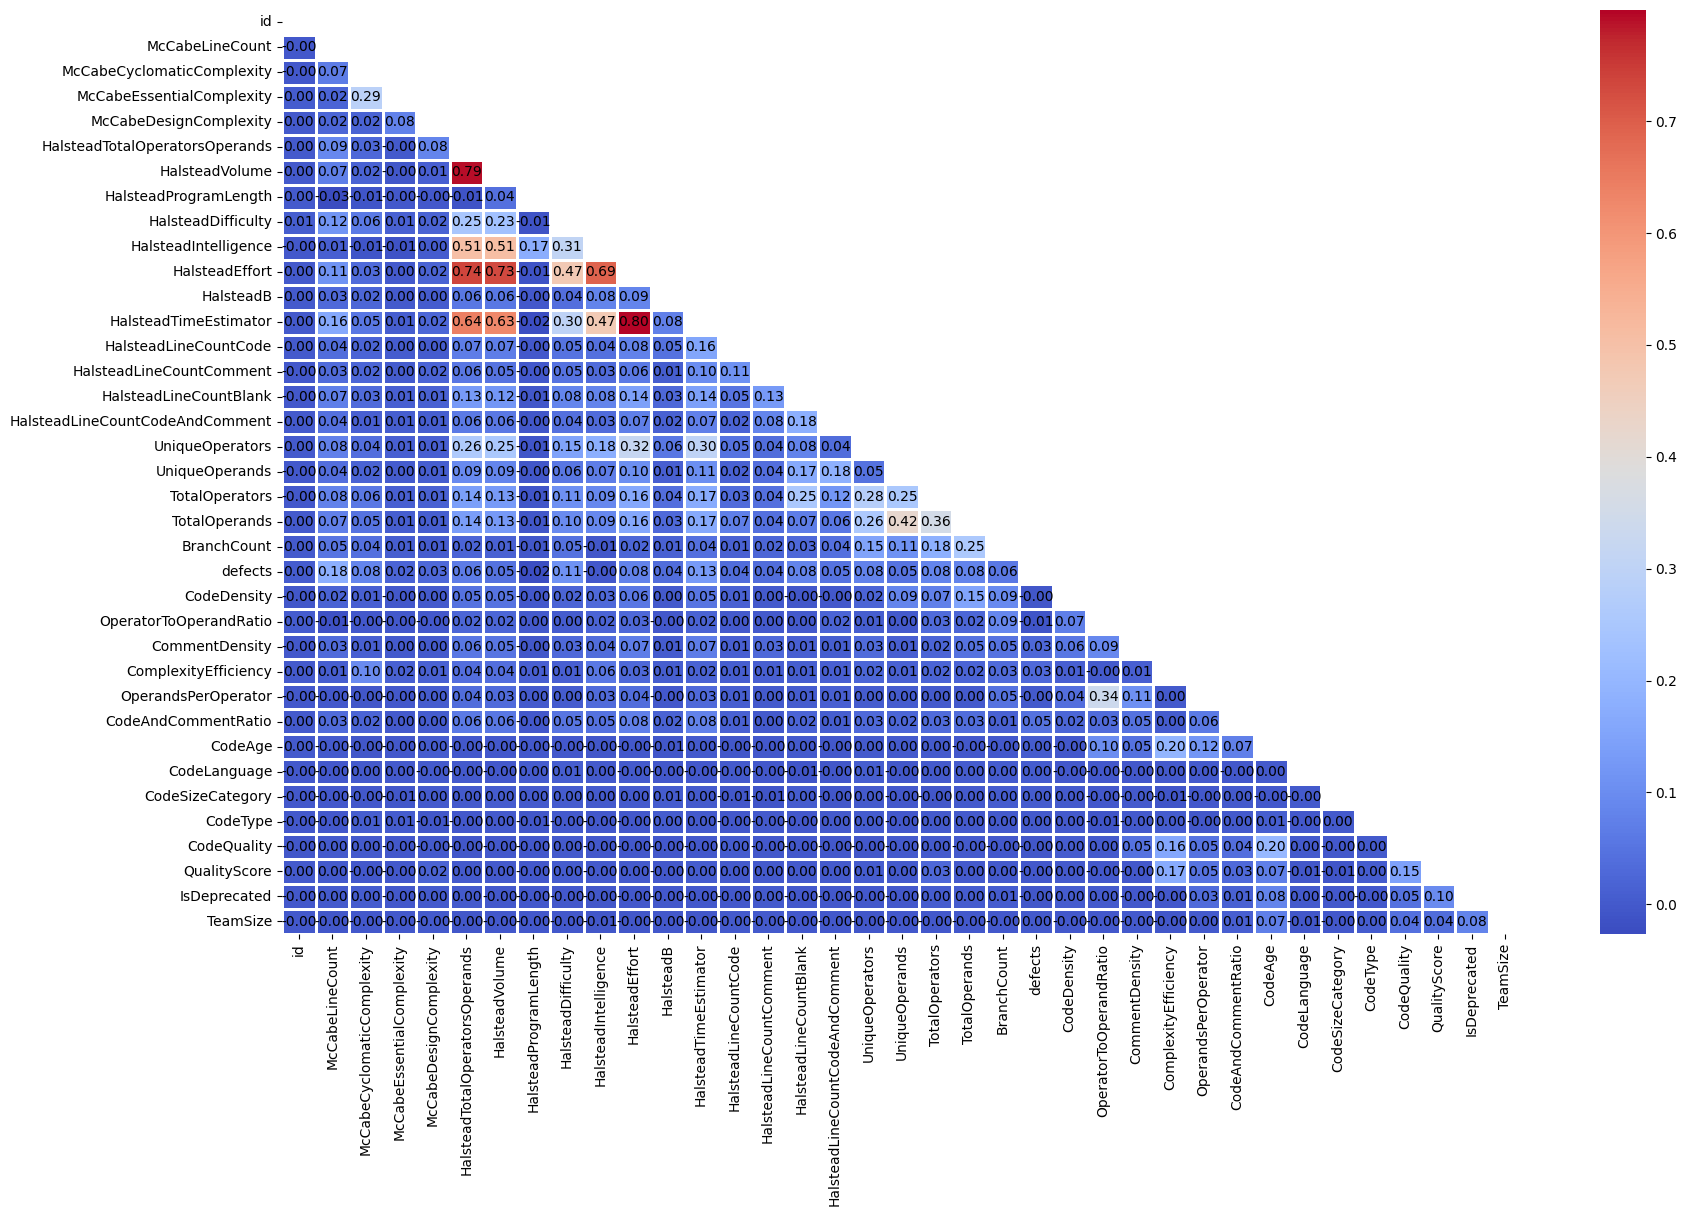

In [32]:
#heatmap
plt.figure(figsize=(20,12))
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr, mask=mask,linewidths=1,annot=True,fmt=".2f",cmap="coolwarm", annot_kws={"size": 10, "color": "black"})
plt.show()

In [42]:
import pandas as pd

#correlation matrix
correlation_matrix = df.corr()
#correlation_matrix = df[numerical_cols].corr()

# Print the correlation matrix
print(correlation_matrix)


                                       id  McCabeLineCount  \
id                               1.000000         0.006962   
McCabeLineCount                  0.006962         1.000000   
McCabeCyclomaticComplexity       0.001783         0.106609   
McCabeEssentialComplexity        0.002691         0.086121   
McCabeDesignComplexity           0.001684         0.134286   
HalsteadTotalOperatorsOperands   0.001449         0.126197   
HalsteadVolume                   0.001734         0.088035   
HalsteadProgramLength           -0.002765        -0.170460   
HalsteadDifficulty               0.009393         0.218835   
HalsteadIntelligence            -0.006305        -0.081171   
HalsteadEffort                   0.002499         0.167820   
HalsteadB                        0.001067         0.126381   
HalsteadTimeEstimator            0.004865         0.301984   
HalsteadLineCountCode            0.002767         0.090790   
HalsteadLineCountComment         0.007109         0.118443   
Halstead

In [44]:
#Calculate absolute correlation matrix
corr_matrix = df.corr().abs()

# Create a mask for the upper triangle (to avoid redundancy)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Mask the upper triangle of the correlation matrix
df1 = corr_matrix.mask(mask)

# Identify columns (features) with correlations above 0.95
df1_drop = [x for x in df1.columns if any(df1[x] > 0.95)]

print("Highly Correlated Features to Drop:", df1_drop)

# Drop the highly correlated features from your original DataFrame
df_cleaned = df.drop(columns=df1_drop)

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Highly Correlated Features to Drop: []
Original DataFrame shape: (59418, 38)
Cleaned DataFrame shape: (59418, 38)


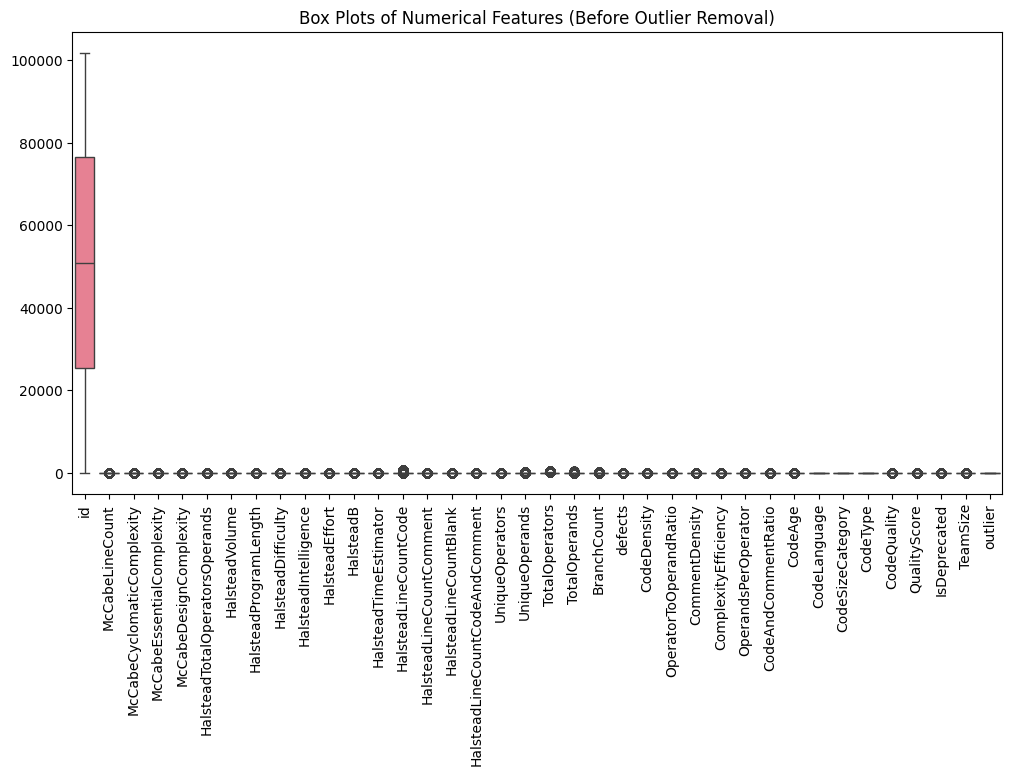

In [52]:
# Before removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Features (Before Outlier Removal)")
plt.xticks(rotation=90)
plt.show()

In [45]:
#Outlier detection
import pandas as pd
import numpy as np
from scipy import stats

# Calculate Z-scores for each numerical feature
z_scores = np.abs(stats.zscore(df[numerical_cols]))

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outlier_indices = (z_scores > threshold).any(axis=1)
outliers = df[outlier_indices]

print("Number of outliers detected:", outliers.shape[0])
print(outliers)

# Drop outliers (inplace modification)
df.drop(outliers.index, inplace=True)

print("Shape of DataFrame after removing outliers:", df.shape)

Number of outliers detected: 22565
            id  McCabeLineCount  McCabeCyclomaticComplexity  \
3      11168.0         2.995732                         3.0   
6      31557.0         3.401197                         3.0   
12     46869.0         2.772589                         3.0   
17     59476.0         2.397895                         2.0   
21     88886.0         3.401197                         4.0   
...        ...              ...                         ...   
74768  28693.0         2.079442                         2.0   
74775  67969.0         4.897840                        19.0   
74783  16023.0         4.158883                        13.0   
74787  37194.0         2.397895                         1.0   
74792  65170.0         2.708050                        98.0   

       McCabeEssentialComplexity  McCabeDesignComplexity  \
3                            1.0                     3.0   
6                            1.0                     3.0   
12                          

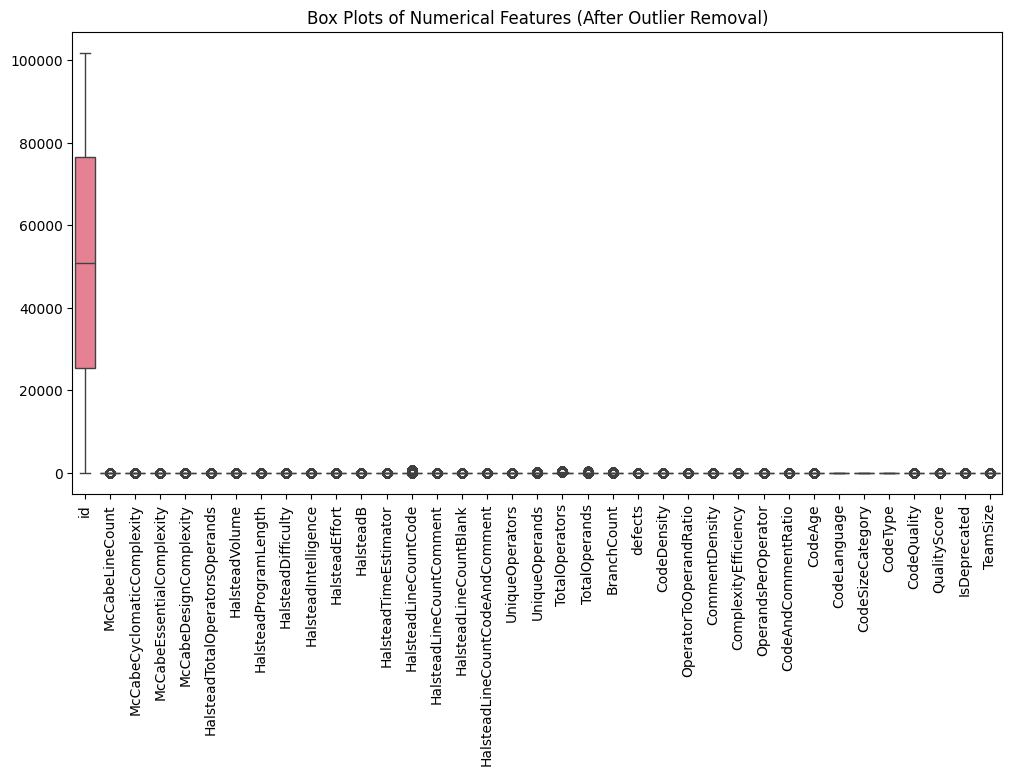

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plots of Numerical Features (After Outlier Removal)")
plt.xticks(rotation=90)
plt.show()

In [35]:
#Isolation forest

# from sklearn.ensemble import IsolationForest

# # Assuming 'df' is your DataFrame with 37 features
# # Select numerical columns
# numerical_cols = df.select_dtypes(include=[np.number, 'float']).columns

# # Create an Isolation Forest model
# model = IsolationForest(contamination=0.05)  # Adjust contamination as needed

# # Fit the model and predict outliers
# df['outlier'] = model.fit_predict(df[numerical_cols])

# # Outliers are labeled as -1
# outliers = df[df['outlier'] == -1]

# print(outliers)

# df.drop(outliers.index, inplace=True)
# df.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


            id  McCabeLineCount  McCabeCyclomaticComplexity  \
5      48696.0         3.218876                         6.0   
19     82395.0         4.488636                        18.0   
39     54950.0         3.401197                         3.0   
41      5537.0         3.713572                       294.0   
48     75835.0         3.737670                         5.0   
...        ...              ...                         ...   
74751   3890.0         5.093750                        24.0   
74762   2747.0         4.727388                        12.0   
74765  25658.0         3.737670                         6.0   
74781  67221.0         4.127134                         3.0   
74793    860.0         2.890372                         2.0   

       McCabeEssentialComplexity  McCabeDesignComplexity  \
5                           36.0                    72.0   
19                          10.0                    12.0   
39                           1.0                     3.0   
41 

(59418, 38)